In [1]:
import vlbisim.vlbisim as vlbisim
from vlbisim.vlbisim import Telescope
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#make plots look a bit nicer
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Quicksand"
})

## 1) Plot uv-coverages and highlight baselines

In [2]:
#load existing array
eht=vlbisim.getArray("eht")

#print some information about the array
for tel in eht:
    print(tel)

Telescope Arizona located at lat: 32.701547; lon: -109.891269, height: 3177.0
Telescope APEX located at lat: -23.005893; lon: -67.759155, height: 5057.0
Telescope PV located at lat: 37.066162; lon: -3.392918, height: 2839.0
Telescope JCMT located at lat: 19.822485; lon: -155.476718, height: 4066.0
Telescope LMT located at lat: 18.985439; lon: -97.314765, height: 4568.0
Telescope SMA located at lat: 19.8237546; lon: -155.47742, height: 4086.0
Telescope ALMA located at lat: -23.024135; lon: -67.75423, height: 5032.0
Telescope SPT located at lat: -89.99; lon: -63.453056, height: 2831.0
Telescope GLT located at lat: 76.531203; lon: -68.703161, height: 68.0
Telescope NOEMA located at lat: 44.63389; lon: 5.90792, height: 2556.0
Telescope KP located at lat: 31.9533; lon: -111.615, height: 1918.0
Telescope OVRO located at lat: 37.23341; lon: -118.28344, height: 1208.0
Telescope KTY located at lat: 37.565237; lon: 126.941015, height: 77.0
Telescope KTP located at lat: 37.543703; lon: 128.442235

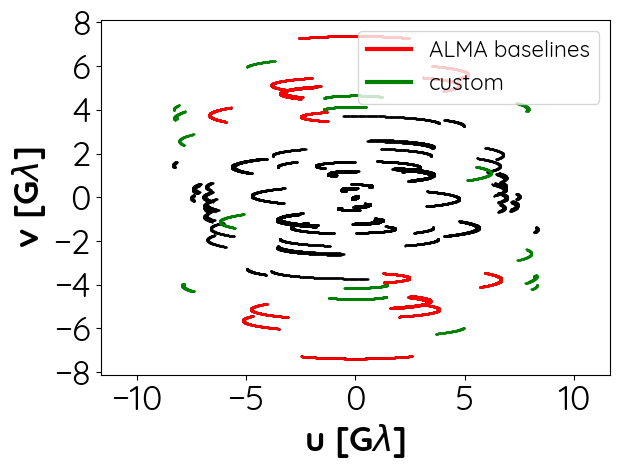

In [3]:
#you can also add a custom telescope
eht.append(Telescope(-10.0,10.0,name="custom",elev_lim=20))

#Define Source coordinates in RA/Dec or hourangle or degrees works both
source=["05:09:25.9645434784","05:41:35.333636817"]

#simulate uv-coverage from 0:00 to 24:00 on 2025-04-01
uv_coverages=vlbisim.simulateUV(eht,source,n_iter=1000,obsstart=0,obsend=24,obsday="2025-04-01",plotLim=18000)

#select baselines to highlight
highlight_baselines=vlbisim.getHighlightBaselines(eht,names=["ALMA"])
highlight_baselines2=vlbisim.getHighlightBaselines(eht,names=["custom"])

#plot simulated uv-coverage with highlight baselines
vlbisim.plotUVdata(uv_coverages,highlight_baselines=[highlight_baselines,highlight_baselines2],
                   baseline_colors=["black","red","green"],wavelength=1.3e-6)

plt.axis('equal')
    
#plot legend
colors = ["red","green"]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['ALMA baselines',"custom"]
plt.legend(lines, labels,fontsize=16)
    
plt.tight_layout()    
plt.show()

### It is also possible to split the coverage into several scans

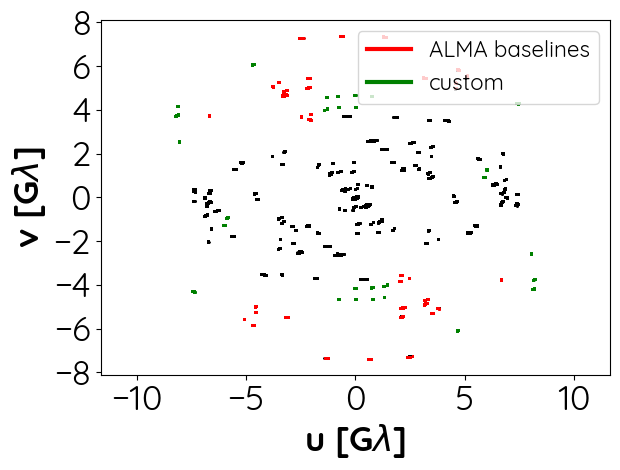

In [4]:
#simulate #simulate uv-coverage from 0:00 to 24:00 on 2025-04-01
uv_coverages=vlbisim.SplitScans(eht,source,n_iter=1000,obstart=0,obsend=24,obsday="2025-04-01",
                                scan_time=10/60, #time in hours per scan
                                n_scans=12) #total number of scans


#select baselines to highlight
highlight_baselines=vlbisim.getHighlightBaselines(eht,names=["ALMA"])
highlight_baselines2=vlbisim.getHighlightBaselines(eht,names=["custom"])

#plot simulated uv-coverage with highlight baselines
for uv_coverage in uv_coverages:
    vlbisim.plotUVdata(uv_coverage,highlight_baselines=[highlight_baselines,highlight_baselines2],
                       baseline_colors=["black","red","green"],wavelength=1.3e-6)

plt.axis('equal')
    
#plot legend
colors = ["red","green"]
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['ALMA baselines',"custom"]
plt.legend(lines, labels,fontsize=16)
    
plt.tight_layout()    
plt.show()

## 2) Plot Uptimes

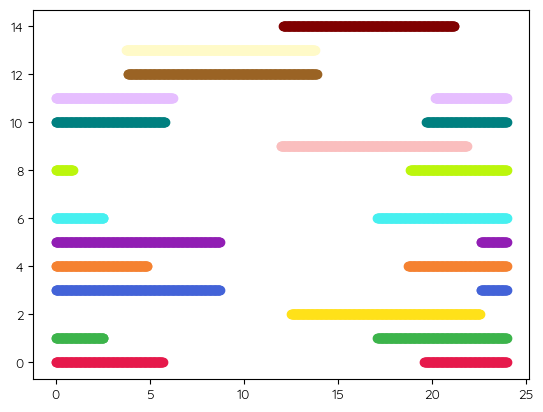

In [5]:
uv_coverage=vlbisim.simulateUV(eht,source,n_iter=1000,obsstart=0,obsend=24,
                   plotUptime=True) #set uptime plot to True!

### Additionally, it is possible to return the uptimes for every telescope, for manual plotting

In [6]:
uv_coverage, uptimes = vlbisim.simulateUV(eht,source,n_iter=1000,obsstart=0,obsend=24,
                   return_uptime=True) #set uptime plot to True!
print(uptimes)

[[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tr

## 3) Creating illustrative movies of uv-coverages and dirty images

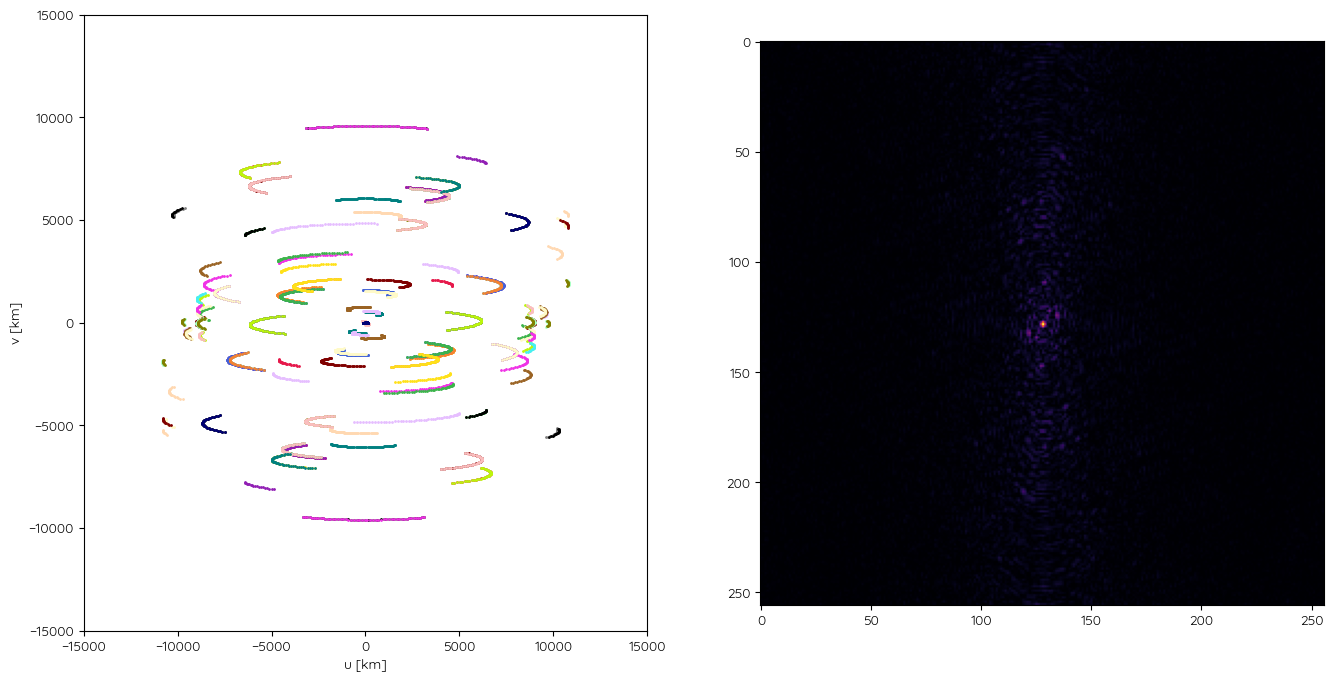

In [7]:
uv_coverage=vlbisim.simulateUV(eht,source,
                               output_name="movie.mp4", #output name of movie
                               n_iter=200,
                               make_movie=True,
                               imgSize=256
                              )